In [1]:
import torch
import numpy as np
#from biases.hamiltonian import ChainPendulum, Animation2d, MLE,MLE2
from biases.datasets import RigidBodyDataset
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [4]:
#!pip install mayavi
#!jupyter nbextension install --py mayavi

In [2]:
from biases.systems.chain_pendulum import ChainPendulum
from biases.systems.magnet_pendulum import MagnetPendulum
from biases.systems.rotor import Rotor
from biases.systems.gyroscope import Gyroscope
from biases.systems.satellite import Satellite

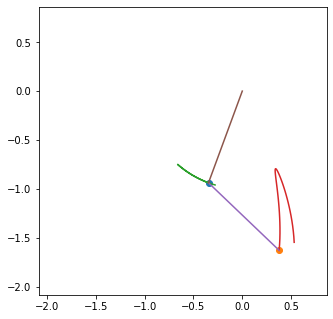

In [45]:
P = ChainPendulum(2)
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,5,100))
HTML(P.animate(zt.data))

In [33]:
P = Rotor()
z0 = P.sample_initial_conditions(100)

tensor(1.8499e-07)


In [5]:
P = Satellite()
z0 = P.sample_initial_conditions(10)
# zt = P.integrate(z0,torch.linspace(0,20,1000))
# HTML(P.animate(zt.data-zt[:,:,:,:1].data))

In [11]:
zt = P.integrate(z0,torch.linspace(0,3,300),tol=1e-5,method="rk4")


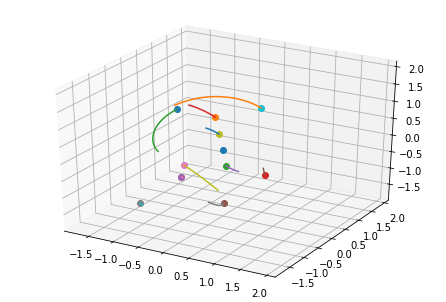

In [12]:
HTML(P.animate(zt.data-zt.data[:,:,:,:1]))

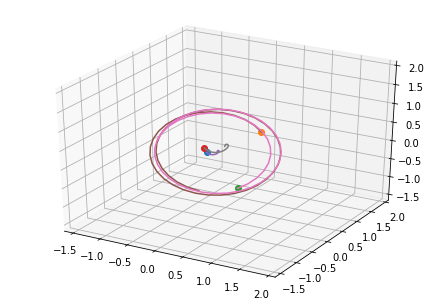

In [5]:
zt = P.integrate(z0,torch.linspace(0,10,300))
HTML(P.animate(zt.data))#-zt[:,:,:,:1].data))

In [47]:
zt.shape

torch.Size([1, 100, 2, 2, 2])

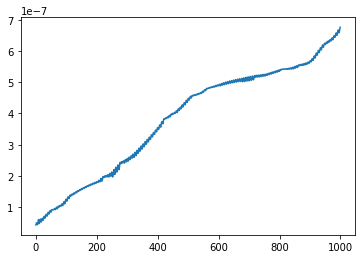

In [9]:
Q = zt[0,:,0,1:]-zt[0,:,0,:1]
plt.plot((Q@Q.permute(0,2,1) - torch.eye(3)).abs().mean(dim=(-1,-2)))

In [10]:
Q@Q.permute(0,2,1)

tensor([[[ 1.0000e+00,  1.5850e-08,  1.5232e-08],
         [ 1.5850e-08,  1.0000e+00, -6.9731e-08],
         [ 1.5232e-08, -6.9731e-08,  1.0000e+00]],

        [[ 1.0000e+00,  1.6440e-08,  1.7847e-08],
         [ 1.6440e-08,  1.0000e+00, -7.0803e-08],
         [ 1.7847e-08, -7.0803e-08,  1.0000e+00]],

        [[ 1.0000e+00,  1.9591e-08,  2.8540e-08],
         [ 1.9591e-08,  1.0000e+00, -7.5662e-08],
         [ 2.8540e-08, -7.5662e-08,  1.0000e+00]],

        ...,

        [[ 1.0000e+00, -9.2234e-09,  1.0741e-07],
         [-9.2234e-09,  1.0000e+00, -1.3203e-07],
         [ 1.0741e-07, -1.3203e-07,  1.0000e+00]],

        [[ 1.0000e+00, -1.2924e-08,  1.0897e-07],
         [-1.2924e-08,  1.0000e+00, -1.3222e-07],
         [ 1.0897e-07, -1.3222e-07,  1.0000e+00]],

        [[ 1.0000e+00, -1.8985e-08,  1.3361e-07],
         [-1.8985e-08,  1.0000e+00, -1.3966e-07],
         [ 1.3361e-07, -1.3966e-07,  1.0000e+00]]], dtype=torch.float64)

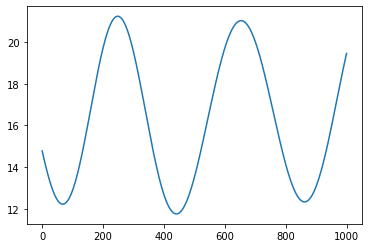

In [55]:
plt.plot(P.hamiltonian(1,zt[0].reshape(zt.shape[1],-1)))

In [51]:
zt.shape

torch.Size([1, 100, 2, 2, 2])

In [52]:
P.hamiltonian(1,zt[0].reshape(zt.shape[1],-1))

tensor([-1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436, -1.5436,
        -1.5436, -1.5436, -1.5436, -1.54

In [ ]:
from vtk import (vtkSphereSource, vtkPolyDataMapper, vtkActor, vtkRenderer,
        vtkRenderWindow, vtkWindowToImageFilter, vtkPNGWriter)

sphereSource = vtkSphereSource()
mapper = vtkPolyDataMapper()
mapper.SetInputConnection(sphereSource.GetOutputPort())

actor = vtkActor()
actor.SetMapper(mapper)

renderer = vtkRenderer()
renderWindow = vtkRenderWindow()
renderWindow.SetOffScreenRendering(1)
renderWindow.AddRenderer(renderer)

renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1)

renderWindow.Render()

windowToImageFilter = vtkWindowToImageFilter()
windowToImageFilter.SetInput(renderWindow)
windowToImageFilter.Update()

writer = vtkPNGWriter()
writer.SetFileName("sphere.png")
writer.SetInputConnection(windowToImageFilter.GetOutputPort())
writer.Write()

In [3]:
import numpy as np

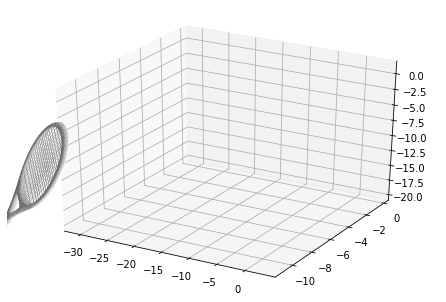

In [7]:
P = Rotor()
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,30,400))
HTML(P.animate(zt.data))

In [36]:
import numpy as np
def read_obj(filename):
    triangles = []
    vertices = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # face data
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    triangles.append(indices[i: i+3])
            elif components[0] == "v": # vertex data
                # e.g. "v  30.2180 89.5757 -76.8089"
                #print(components)
                vertex = list(map(lambda c: float(c), components[2:]))
                vertices.append(vertex)
    return np.array(vertices), np.array(triangles)

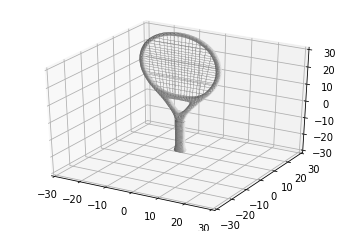

In [43]:
import matplotlib.pyplot as plt
vertices, triangles = read_obj("10540_Tennis_racket_V2_L3.obj")
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]
ax = plt.axes(projection='3d')
ax.set_xlim([-30, 30])
ax.set_ylim([-30, 30])
ax.set_zlim([-30, 30])
tri = ax.plot_trisurf(x, z, triangles, y, shade=True, color='white')

In [44]:
dir(tri)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_capstyle',
 '_clipon',
 '_clippath',
 '_closed',
 '_codes3d',
 '_contains',
 '_edge_default',
 '_edgecolors',
 '_edgecolors2d',
 '_edgecolors3d',
 '_facecolors',
 '_facecolors2d',
 '_facecolors3d',
 '_factor',
 '_get_clipping_extent_bbox',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_in_layout',
 '_is_filled',
 '_is_stroked',
 '_joinstyle',
 '_label',
 '_linestyles',
 '_linewidths',
 '_mouseover',
 '_offset_position',
 '_offsets',
 '_oid',
 '_original_edgecolor',
 '_original_facecolor',
 '_path_effects'

In [50]:
tri.set_verts([-vertices])


In [46]:
tri.get_transforms()

array([], shape=(0, 3, 3), dtype=float64)

In [ ]:
P = MagnetPendulum(q=.05,magnets=5)
z0 = P.sample_initial_conditions(1)
zt = P.integrate(z0,torch.linspace(0,30,400))
HTML(P.animate(zt.data))

In [5]:
z0 = P.sample_initial_conditions(1)

In [6]:
angles_vel = torch.randn(3,2,2,1)
z0 = P.body2globalCoords(angles_vel)
angles_vel2 = P.global2bodyCoords(z0)

In [7]:
((angles_vel2[:,1]-angles_vel[:,1])**2).mean()/((angles_vel2+angles_vel)**2).mean()

tensor(1.5961)

In [8]:
(z0[0,0,0]**2).sum()

tensor(1.)

In [9]:
(z0[0,1,0]*z0[0,0,0]).sum()

tensor(0.)

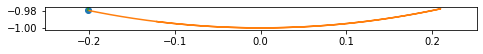

In [39]:
P = ChainPendulum(1,m=1)
z0 = P.sample_initial_conditions(5)
zt = P.integrate(z0,torch.linspace(0,10,100).double())
HTML(P.animate(zt.data))

In [40]:
#at = P.global2bodyCoords(zt.reshape(-1,*z0.shape[1:])).reshape(*zt.shape[:-1])

In [41]:
#plt.plot(at[:,:,0,0].T,at[:,:,1,0].T);

In [42]:
#plt.plot(at[:,:,0,0].T,at[:,:,1,0].T);

In [8]:
from scipy.spatial.transform import Rotation
import torch
import numpy as np

In [274]:
# Hodge star on R3
def flip(x, dim):
    dim = x.dim() + dim if dim < 0 else dim
    return x[tuple(slice(None, None) if i != dim
             else torch.arange(x.size(i)-1, -1, -1).long()
             for i in range(x.dim()))]

def cross_matrix(k):
    """Application of hodge star on R3, mapping Λ^1 R3 -> Λ^2 R3"""
    K = torch.zeros(*k.shape[:-1],3,3,device=k.device,dtype=k.dtype)
    K[...,0,1] = -k[...,2]
    K[...,0,2] = k[...,1]
    K[...,1,0] = k[...,2]
    K[...,1,2] = -k[...,0]
    K[...,2,0] = -k[...,1]
    K[...,2,1] = k[...,0]
    return K

def uncross_matrix(K):
    """Application of hodge star on R3, mapping Λ^2 R3 -> Λ^1 R3"""
    k = torch.zeros(*K.shape[:-1],device=K.device,dtype=K.dtype)
    k[...,0] = (K[...,2,1] - K[...,1,2])/2
    k[...,1] = (K[...,0,2] - K[...,2,0])/2
    k[...,2] = (K[...,1,0] - K[...,0,1])/2
    return k

def eulerdot2omega(euler):
    """(bs,3) -> (bs,3,3) matrix"""
    bs,_ = euler.shape
    M = torch.zeros(bs,3,3,device=euler.device,dtype=euler.dtype)
    phi,theta,psi = euler.T
    M[:,0,0] = theta.sin()*psi.sin()
    M[:,0,1] = psi.cos()
    M[:,1,0] = theta.sin()*psi.cos()
    M[:,1,1] = -psi.sin()
    M[:,2,0] = theta.cos()
    M[:,2,2] = 1
    return M

def euler2frame(euler_and_dot):
    """ input: (bs,2,3)
        output: (bs,2,3,3)"""
    euler,eulerdot = euler_and_dot.permute(1,0,2)
    omega = (eulerdot2omega(euler)@eulerdot.unsqueeze(-1)).squeeze(-1)
    # omega = (angular velocity in the body frame)
    RT_Rdot = cross_matrix(omega) 
    R = torch.from_numpy(Rotation.from_euler('ZXZ',euler.data.numpy()).as_matrix()).to(euler.device,euler.dtype)
    Rdot = R@RT_Rdot
    return torch.stack([R,Rdot],dim=1).permute(0,1,3,2) # (bs,2,d,n->bs,2,n,d)

def frame2euler(frame_pos_vel):
    """ input: (bs,2,3,3)
        output: (bs,2,3)"""
    R,Rdot = frame_pos_vel.permute(1,0,3,2)#frame_pos_vel[:,0,1:].permute(0,2,1)-frame_pos_vel[:,0,0].unsqueeze(-1) #(bs,3,3)
    #Rdot = frame_pos_vel[:,1,1:].permute(0,2,1)-frame_pos_vel[:,1,0].unsqueeze(-1) #(bs,3,3)
    omega = uncross_matrix(R.permute(0,2,1)@Rdot) #angular velocity in body frame Omega = RTRdot
    angles = torch.from_numpy(np.ascontiguousarray(Rotation.from_matrix(R.data.numpy()).as_euler('ZXZ'))).to(R.device,R.dtype)
    eulerdot = torch.solve(omega.unsqueeze(-1),eulerdot2omega(angles))[0].squeeze(-1)
    return torch.stack([angles,eulerdot],dim=1)

In [275]:
eps = 1e-3
euler_and_dot = torch.randn(1,2,3)
#euler_and_dot[:,1,:2]=0
euler_and_dot_advanced = euler_and_dot.clone()
euler_and_dot_advanced[:,0] += eps*euler_and_dot[:,1]
frame = euler2frame(euler_and_dot)
frame[:,0] += eps*frame[:,1]
euler_advanced2 = frame2euler(frame)
print((euler_and_dot_advanced[:,0]-euler_advanced2[:,0])/eps)
print((euler2frame(euler_and_dot_advanced)[:,0]-frame[:,0])/eps)

tensor([[-3141.5928, -1283.8604, -3141.5923]])
tensor([[[-5.9605e-05,  1.1921e-04, -1.1176e-04],
         [ 5.9605e-05,  8.9407e-05,  5.9605e-05],
         [-1.7881e-04, -7.4506e-05, -5.9605e-05]]])


In [276]:
print(euler_and_dot[:,0])
print(euler_and_dot_advanced[:,0])
print(euler_advanced2[:,0])

tensor([[-1.9532, -0.6422, -0.1824]])
tensor([[-1.9526, -0.6419, -0.1828]])
tensor([[1.1890, 0.6419, 2.9588]])


In [273]:
print(euler2frame(euler_and_dot)[:,0])
print(euler2frame(euler_and_dot_advanced)[:,0])
print(frame[:,0])

tensor([[[ 0.8469,  0.5197, -0.1124],
         [-0.3402,  0.6922,  0.6365],
         [ 0.4086, -0.5008,  0.7631]]])
tensor([[[ 0.8469,  0.5196, -0.1128],
         [-0.3399,  0.6922,  0.6367],
         [ 0.4089, -0.5009,  0.7628]]])
tensor([[[ 0.8469,  0.5196, -0.1128],
         [-0.3399,  0.6922,  0.6367],
         [ 0.4089, -0.5009,  0.7628]]])


In [77]:
euler_and_dot = torch.randn(1,2,3)
euler_and_dot[:,1] = 0
euler_and_dot[:,1,0] =1
e2 = euler_and_dot.clone()
e2[:,0] += .005*e2[:,1]
euler_and_dot_traj = torch.cat([euler_and_dot,e2],dim=0)
frame = euler2frame(euler_and_dot_traj)

In [78]:
frame2euler(frame)-euler_and_dot_traj

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 1.1921e-07,  5.4352e-09, -8.6669e-08]],

        [[-1.4901e-08,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  5.0258e-11, -1.9422e-08]]])

In [40]:
A = -cross_matrix(torch.tensor([1e-3,0.,0.]))
frame[1] += frame[1]@A
euler_back =frame2euler(frame)
print(euler_back[1]-euler_back[0])

tensor([[ 0.0010, -0.0019, -0.0012],
        [ 0.0000,  0.0000,  0.0000]])


In [35]:
frame[0,0]

tensor([[-0.6406,  0.5169, -0.5678],
        [-0.4732, -0.8481, -0.2383],
        [-0.6047,  0.1160,  0.7879]])

In [36]:
print(frame[1,0]-frame[0,0])
print((frame[1,0]-frame[0,0])/frame[0,1])

tensor([[-0.0028,  0.0005,  0.0036],
        [-0.0012,  0.0002,  0.0015],
        [ 0.0039, -0.0007,  0.0031]])
tensor([[-0.0053,  0.0024, -0.0093],
        [-0.0053,  0.0024, -0.0020],
        [-0.0053,  0.0024, -0.0060]])


In [241]:
print(frame[0,1])

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0., -1.,  0.]])


In [193]:
frame[1,1]@frame[1,0].T

tensor([[-1.3562e-08,  4.6989e-09, -9.9293e-01],
        [ 1.5844e-09, -3.0165e-10,  1.1872e-01],
        [ 9.9293e-01, -1.1872e-01,  8.5151e-09]])

In [85]:
frame[0,0]

tensor([[-0.0286, -0.5461,  0.8373],
        [ 0.9708,  0.1844,  0.1534],
        [-0.2381,  0.8172,  0.5249]])

In [86]:
frame[1,0]

tensor([[-0.0241, -0.4599,  0.8877],
        [ 0.9716,  0.1985,  0.1292],
        [-0.2356,  0.8655,  0.4420]])

In [75]:
euler_and_dot_traj[:,0]

tensor([[-0.0680, -1.4323,  1.1169],
        [ 0.0320, -1.4323,  1.1169]])

In [48]:
e2[:,0]

tensor([[ 9.9891, -3.4993, 10.3205]])

In [6]:
r = R.from_euler('zyx', [[90, 0, 0],[0, 45, 0],[45, 60, 30]], degrees=True)

In [9]:
r.as_matrix().shape

(3, 3, 3)

In [4]:
import torch
x = torch.randn(3)
torch.cat([x.sum()[None],x])

tensor([ 0.0877,  0.8217, -0.0012, -0.7328])

In [10]:
r[0].as_dcm()

array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [28]:
P = ChainPendulum(8)
z0 = P.sample_initial_conditions(1).double()
bs = z0.shape[0]
xp = torch.stack([z0[:,0].double(),P.M@z0[:,1].double()],dim=1).reshape(bs,-1)
ts = torch.linspace(0,100,100).double()
es = MLE2(xp,P.dynamics(wgrad=True),ts,rtol=1e-4)

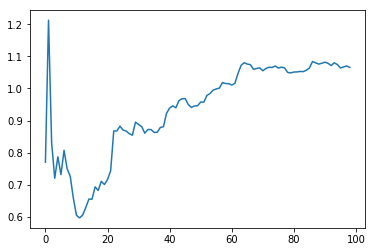

In [29]:
plt.plot(es[1:,0,-1]/ts[1:])

In [26]:
es[1:,0,-1]/ts[1:]

tensor([0.3096, 0.4782, 0.4265, 0.4239, 0.4710, 0.4626, 0.4632, 0.4701, 0.4531,
        0.4529, 0.4555, 0.4560, 0.4426, 0.4160, 0.4254, 0.4259, 0.4292, 0.4243,
        0.4297, 0.4153, 0.4112, 0.4208, 0.4308, 0.4294, 0.4299, 0.4276, 0.4272,
        0.4239, 0.4057, 0.4066, 0.4076, 0.4105, 0.4177, 0.4211, 0.4213, 0.4229,
        0.4230, 0.4229, 0.4200, 0.4260, 0.4254, 0.4258, 0.4270, 0.4256, 0.4228,
        0.4231, 0.4235, 0.4240, 0.4213, 0.4195, 0.4192, 0.4170, 0.4166, 0.4164,
        0.4193, 0.4207, 0.4229, 0.4163, 0.4173, 0.4175, 0.4205, 0.4248, 0.4276,
        0.4282, 0.4252, 0.4265, 0.4270, 0.4230, 0.4195, 0.4221, 0.4192, 0.4190,
        0.4190, 0.4233, 0.4232, 0.4259, 0.4287, 0.4287, 0.4322, 0.4332, 0.4295,
        0.4273, 0.4307, 0.4279, 0.4265, 0.4278, 0.4281, 0.4287, 0.4290, 0.4267,
        0.4285, 0.4293, 0.4321, 0.4336, 0.4338, 0.4355, 0.4331, 0.4328, 0.4318],
       dtype=torch.float64)

In [33]:
P = ChainPendulum(6)
z0s = P.sample_initial_conditions(1).double()
ts = torch.linspace(0,100,10000).double()
zt = P.integrate(z0s,ts).float()

In [34]:
xp = torch.stack([zt[0,:,0].double(),P.M@zt[0,:,1].double()],dim=1).reshape(ts.shape[0],-1)
D = xp.shape[-1]

In [35]:
exps = MLE(xp,ts,P.dynamics(wgrad=True))#,v0=xp[0])

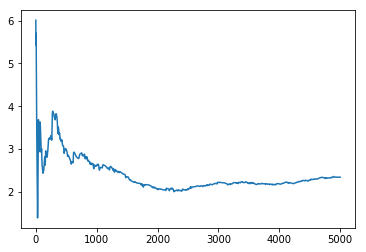

In [36]:
plt.plot(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))

In [32]:
(np.cumsum(exps[::-1][:5000])/(1+np.arange(5000)))[-100:]

array([0.02083264, 0.02083721, 0.02084123, 0.02084469, 0.02084759,
       0.02084995, 0.02085177, 0.02085305, 0.02085378, 0.02085398,
       0.02085363, 0.02085274, 0.0208513 , 0.0208493 , 0.02084673,
       0.02084359, 0.02083987, 0.02083555, 0.02083062, 0.02082507,
       0.02081888, 0.02081203, 0.02080451, 0.02079629, 0.02078737,
       0.0207777 , 0.02076728, 0.02075608, 0.02074408, 0.02073124,
       0.02071754, 0.02070297, 0.02068747, 0.02067104, 0.02065364,
       0.02063524, 0.02061581, 0.02059531, 0.02057373, 0.02055102,
       0.02052716, 0.02050211, 0.02047584, 0.02044833, 0.02041953,
       0.02038943, 0.02035798, 0.02032516, 0.02029095, 0.0202553 ,
       0.02021819, 0.0201796 , 0.0201395 , 0.02009787, 0.02005468,
       0.0200099 , 0.01996353, 0.01991553, 0.01986589, 0.0198146 ,
       0.01976163, 0.01970699, 0.01965065, 0.01959261, 0.01953286,
       0.01947139, 0.01940822, 0.01934332, 0.01927671, 0.0192084 ,
       0.01913838, 0.01906666, 0.01899327, 0.01891821, 0.01884

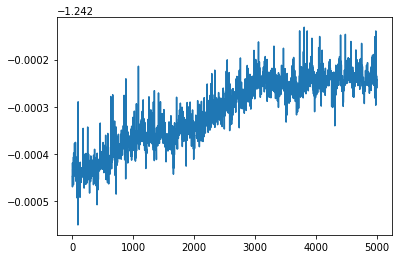

In [29]:
plt.plot(P.hamiltonian(ts,xp))

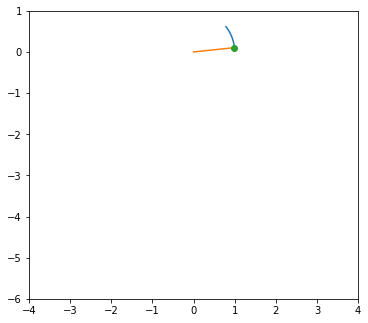

In [17]:
xt = zt[0,:,0,:].permute(1,2,0).cpu()
HTML(Animation2d(xt.float(),P,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [13]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [51]:
body = ChainPendulum(5,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2#*.01
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [88]:
body.sample_initial_conditions(1).shape

torch.Size([1, 2, 5, 2])

In [86]:
body.__class__

core.hamiltonian.ChainPendulum

In [54]:
ts = torch.linspace(0,50,1000)
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-6, method='rk4').permute(1, 0, 2)


In [55]:
zs.shape

torch.Size([1, 1000, 20])

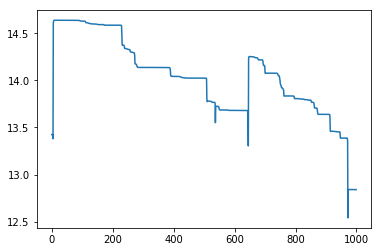

In [56]:
plt.plot(GravityHamiltonian(body.M,body.Minv,None,zs[0]))

In [38]:
zt.shape

torch.Size([1, 5000, 2, 1, 2])

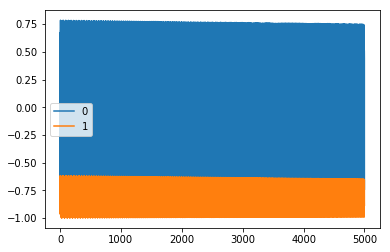

In [39]:
# xt = zs[0,:,:n*d].reshape(len(ts),n,d).permute(1,2,0)
# pt = zs[0,:,n*d:].reshape(len(ts),n,d).permute(1,2,0)
n = len(P.body_graph.nodes)
d=2
for i in range(n*d):
    plt.plot(zt[0,:,0,0,i])
plt.legend(range(n*d))

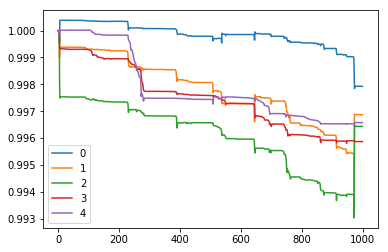

In [58]:
plt.plot((xt[0]**2).sum(0))
for i in range(n-1):
    plt.plot(((xt[1:]-xt[:-1])[i]**2).sum(0))
plt.legend(range(n))
#plt.yscale('log')

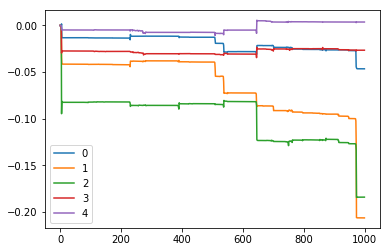

In [59]:
plt.plot((pt[0]*xt[0]).sum(0))
for i in range(n-1):
    plt.plot(((pt[1:]-pt[:-1])[i]*(xt[1:]-xt[:-1])[i]).sum(0))
plt.legend(range(n))
#plt.yscale('log')

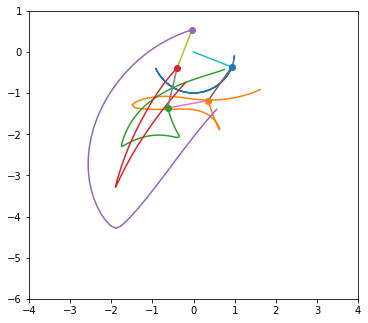

In [60]:
HTML(Animation2d(xt,body,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [42]:
body.body_graph.nodes[0]['m']

KeyError: 'm'

In [44]:
[n for n in body.body_graph.nodes.items()]

[(0, {'tether': tensor([0., 0.]), 'l': 1}), (1, {}), (2, {})]

In [64]:
def tril_mask(value):
    n = value.size(-1)
    coords = value.new(n)
    torch.arange(n, out=coords)
    return coords <= coords.view(n, 1)

In [69]:
tril_mask(torch.eye(3)).float()@tril_mask(torch.eye(3)).float().T

tensor([[1., 1., 1.],
        [1., 2., 2.],
        [1., 2., 3.]])

In [70]:
torch.nn.Parameter(torch.eye(3))

Parameter containing:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)

In [71]:
a = torch.randn(3, 3)
a = torch.mm(a, a.t()) + 1e-05 * torch.eye(3) # make symmetric positive definite
torch.cholesky(a)

tensor([[ 1.8690,  0.0000,  0.0000],
        [-0.8443,  1.0068,  0.0000],
        [-1.8397,  0.0835,  0.9305]])

In [72]:
tril_mask(a)*a

tensor([[ 3.4932, -0.0000, -0.0000],
        [-1.5780,  1.7265,  0.0000],
        [-3.4385,  1.6373,  4.2575]])

In [81]:
_m_lower = torch.nn.Parameter(.1*torch.randn(3,3)+torch.eye(3))
    
def M():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return lower_diag@lower_diag.T
def Minv():
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_inverse(lower_diag)
def MinvSolve(Y):
    lower_diag = tril_mask(_m_lower)*_m_lower
    return torch.cholesky_solve(Y,lower_diag)

In [82]:
Minv()@M()

tensor([[ 1.0000e+00, -1.0992e-09, -7.5389e-09],
        [ 1.8597e-09,  1.0000e+00, -1.6480e-09],
        [-1.0471e-08,  6.6824e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [83]:
M()@Minv()

tensor([[ 1.0000e+00,  1.8597e-09, -1.0471e-08],
        [-1.0992e-09,  1.0000e+00,  6.6824e-09],
        [-7.5389e-09, -1.6480e-09,  1.0000e+00]], grad_fn=<MmBackward>)

In [84]:
MinvSolve(M())

tensor([[ 1.0000e+00,  1.6903e-10, -1.4738e-08],
        [-1.1493e-09,  1.0000e+00,  1.3626e-08],
        [-2.1771e-09,  1.2268e-09,  1.0000e+00]],
       grad_fn=<CholeskySolveBackward>)

In [1]:
import torch
import torch.nn as nn

In [16]:
class A(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.ParameterDict({str(i):nn.Parameter(torch.zeros(i)) for i in range(3)})

In [17]:
b= A()

In [18]:
list(b.parameters())

[Parameter containing:
 tensor([], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True),
 Parameter containing:
 tensor([0., 0.], requires_grad=True)]

In [96]:
import torch
import torch.nn as nn
class RandomTranslate(nn.Module):
    """ """
    def __init__(self):
        super().__init__()
        Sigma = nn.Parameter(torch.eye(3))
        Mu = nn.Parameter(torch.zeros(3))
        self.hyper_parameters = {'Mu':Mu,'Sigma':Sigma}
        self.noise=None
        self.keep_noise=False
        self.aug=True
    def reset_noise(self):
        self.noise = None
    def randomTranslate(self, x,noise=None):
        bs, _, w, h = x.size()
        if self.noise is None: self.noise = torch.randn(bs,3)
        Mu,Sigma = self.hyper_parameters['Mu'],self.hyper_parameters['Sigma']
        z = self.noise@Sigma + Mu
        if not self.keep_noise: self.reset_noise()
        # Build affine matrices for random translation of each image
        affineMatrices = torch.zeros(bs,2,3)
        affineMatrices[:,0,0] = z[:,2].cos()
        affineMatrices[:,0,1] = -z[:,2].sin()
        affineMatrices[:,1,0] = z[:,2].sin()
        affineMatrices[:,1,1] = z[:,2].cos()
        affineMatrices[:,:2,2] = z[:,:2]
        affineMatrices = affineMatrices

        flowgrid = F.affine_grid(affineMatrices.to(x.device,x.dtype), size = x.size())
        x_out = F.grid_sample(x, flowgrid)
        return x_out

    def forward(self, x):
        if self.training and self.aug:
            return self.randomTranslate(x)
        else:
            return x

    def __repr__(self):
        return self.__class__.__name__

In [105]:
A = nn.Sequential(RandomTranslate(),RandomTranslate())

In [106]:
list(A.parameters())

[]

In [109]:
def named_hyper_parameters(model,prefix=''):
    memo=set()
    modules = model.named_modules(prefix=prefix)
    for module_prefix, module in modules:
        if hasattr(module,'hyper_parameters'):
            for k, v in module.hyper_parameters.items():
                if v is None or v in memo:
                    continue
                memo.add(v)
                name = module_prefix + ('.' if module_prefix else '') + k
                yield name, v

def hyper_parameters(model):
    for _,param in named_hyper_parameters(model):
        yield param

In [110]:
list(hyper_parameters(A))

[Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0.], requires_grad=True),
 Parameter containing:
 tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]], requires_grad=True)]

In [91]:
list(A.named_modules())

[('',
  Sequential(
    (0): RandomTranslate
  )),
 ('0', RandomTranslate)]

In [95]:
{'a':1,'b':2}[{'a','b'}]

TypeError: unhashable type: 'set'